In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline


from numpy import genfromtxt

from ripser import ripser, Rips
from DGMTools import *

from mpl_toolkits.mplot3d import Axes3D

from sklearn.manifold import SpectralEmbedding

from sklearn import manifold

from scipy.spatial.distance import directed_hausdorff

import time

In [3]:
fine_name = 'CA1_6_1D_NB_fine_cells_copy.csv'

In [4]:
fine = genfromtxt(fine_name, delimiter=',')

In [6]:
fine_no_time = fine[:,1:]

In [7]:
embedding_2 = SpectralEmbedding(n_components=2, n_neighbors=600)
fine_transformed_2 = embedding_2.fit_transform(fine_no_time)

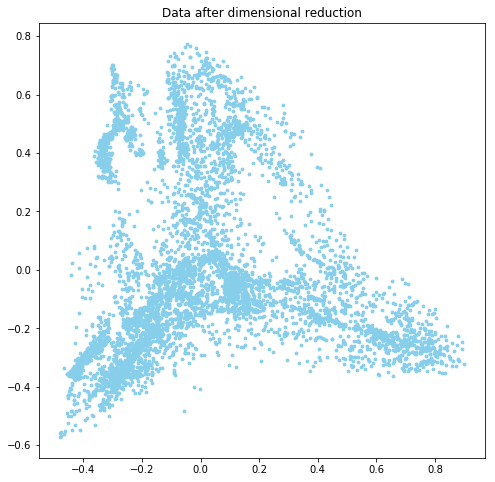

In [8]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
ax.scatter(fine_transformed_2[:,0], fine_transformed_2[:,1], c='skyblue', s=8)
plt.title('Data after dimensional reduction')
plt.show()


Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


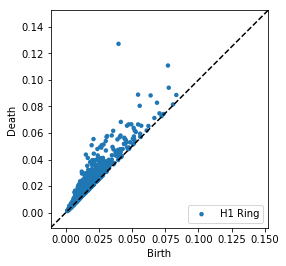

In [9]:
I1 = ripser(fine_transformed_2, maxdim=1)['dgms'][1]

rips = Rips()
rips.plot(I1, labels = ['H1 Ring'])

# Subsampling

In [10]:
X = fine_transformed_2

In [11]:
N_samples = 1000
N_bootst = 3000

sample_inds = np.arange(X.shape[0])


alpha = 95
dist_H = np.zeros(N_samples,dtype = float)


for i in range(N_samples):
    inds = np.random.choice(sample_inds, size=N_bootst, replace=False)
    X_sample = X[inds,:]
    
    dist = directed_hausdorff(X,X_sample)[0]
    dist_H[i] = dist
    
q_alpha_subsampling = np.percentile(dist_H,alpha)

print("result %d-percent quantile = %f" % (alpha,q_alpha_subsampling))

result 95-percent quantile = 0.132500


Text(0.5, 1.0, 'Persistence Diagram of Rips filtration')

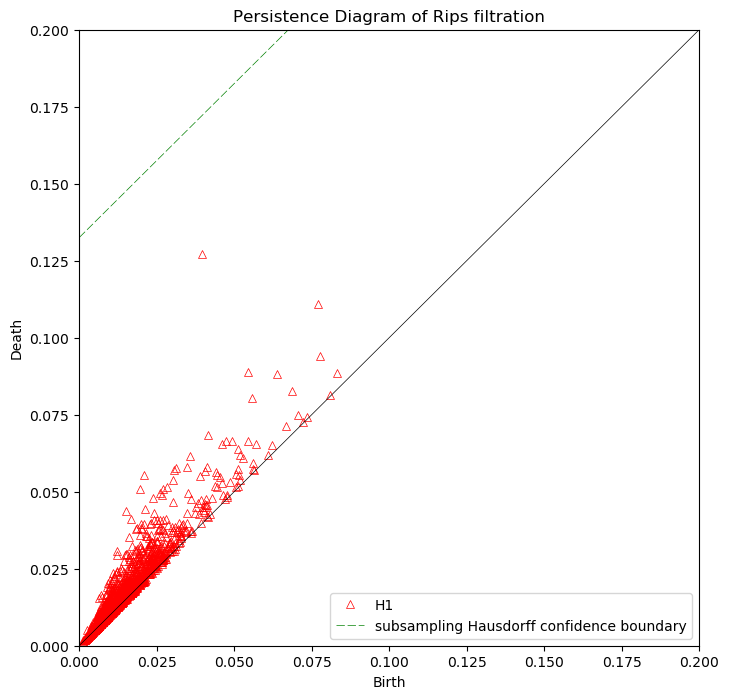

In [12]:
plt.figure(figsize=(8,8))
plt.plot(I1[:,0],I1[:,1], '*', c = 'r', marker='^', fillstyle = 'none',  markeredgewidth=0.5, label = 'H1')

plt.plot(np.linspace(0,0.2,1001),np.linspace(0,0.2,1001),c='k', linewidth=0.5)
plt.plot(np.linspace(0,0.2,1001),np.linspace(0,0.2,1001)+q_alpha_subsampling,'--',
         c='g',label='subsampling Hausdorff confidence boundary', linewidth=0.5, dashes=[12, 4])

plt.xlim((0,0.2))
plt.ylim((0,0.2))
plt.legend()
plt.xlabel('Birth')
plt.ylabel('Death')
plt.title('Persistence Diagram of Rips filtration')